In [1]:
import pandas as pd

df = pd.read_csv('Data.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [2]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2018-02-05,254.259995
1,2018-02-06,265.720001
2,2018-02-07,264.559998
3,2018-02-08,250.100006
4,2018-02-09,249.470001
...,...,...
1004,2022-01-31,427.140015
1005,2022-02-01,457.130005
1006,2022-02-02,429.480011
1007,2022-02-03,405.600006


In [3]:
df['Date']

0       2018-02-05
1       2018-02-06
2       2018-02-07
3       2018-02-08
4       2018-02-09
           ...    
1004    2022-01-31
1005    2022-02-01
1006    2022-02-02
1007    2022-02-03
1008    2022-02-04
Name: Date, Length: 1009, dtype: object

In [4]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [5]:
df

,Date,Close
0,2018-02-05,254.259995
1,2018-02-06,265.720001
2,2018-02-07,264.559998
3,2018-02-08,250.100006
4,2018-02-09,249.470001
...,...,...
1004,2022-01-31,427.140015
1005,2022-02-01,457.130005
1006,2022-02-02,429.480011
1007,2022-02-03,405.600006


In [6]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\Lightning\AppData\Local\Temp\ipykernel_1940\2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      2018-02-05
1      2018-02-06
2      2018-02-07
3      2018-02-08
4      2018-02-09
          ...    
1004   2022-01-31
1005   2022-02-01
1006   2022-02-02
1007   2022-02-03
1008   2022-02-04
Name: Date, Length: 1009, dtype: datetime64[ns]

In [7]:
df.index = df.pop('Date')
df

,Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


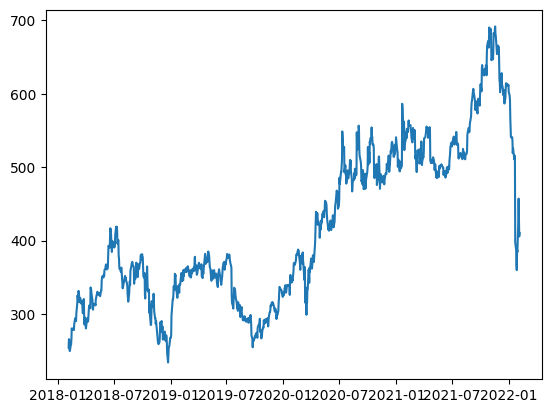

In [8]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [9]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2018-02-08',
                                '2022-02-04',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2018-02-08,254.259995,265.720001,264.559998,250.100006
1,2018-02-09,265.720001,264.559998,250.100006,249.470001
2,2018-02-12,264.559998,250.100006,249.470001,257.950012
3,2018-02-13,250.100006,249.470001,257.950012,258.269989
4,2018-02-14,249.470001,257.950012,258.269989,266.000000
...,...,...,...,...,...
1001,2022-01-31,359.700012,386.700012,384.359985,427.140015
1002,2022-02-01,386.700012,384.359985,427.140015,457.130005
1003,2022-02-02,384.359985,427.140015,457.130005,429.480011
1004,2022-02-03,427.140015,457.130005,429.480011,405.600006


In [10]:
import numpy as np

# Define your windowed_df DataFrame

import pandas as pd
import numpy as np

# Define or load your DataFrame 'windowed_df'
# For example:
# windowed_df = pd.read_csv('your_data.csv')

def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()
    dates = df_as_np[:, 0]
    middle_matrix = df_as_np[:, 1:-1]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))
    Y = df_as_np[:, -1]
    return dates, X.astype(np.float32), Y.astype(np.float32)

# Assuming you have a DataFrame named 'windowed_df'
dates, X, y = windowed_df_to_date_X_y(windowed_df)

print(dates.shape, X.shape, y.shape)


(1006,) (1006, 3, 1) (1006,)


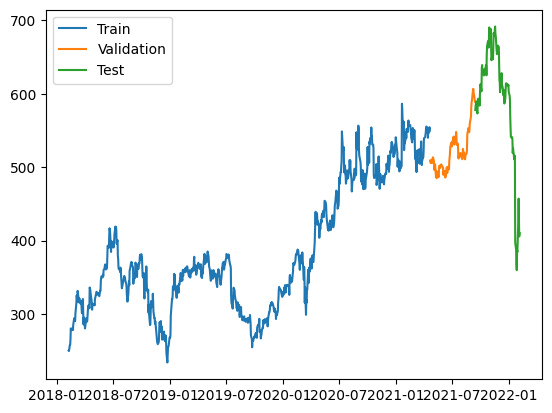

In [11]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
26/26 [==============================] - 4s 31ms/step - loss: 153636.1250 - mean_absolute_error: 382.4536 - val_loss: 267768.6875 - val_mean_absolute_error: 516.6498
Epoch 2/100
26/26 [==============================] - 0s 7ms/step - loss: 148755.8281 - mean_absolute_error: 376.0175 - val_loss: 256194.0625 - val_mean_absolute_error: 505.3239
Epoch 3/100
26/26 [==============================] - 0s 8ms/step - loss: 135678.2031 - mean_absolute_error: 358.0272 - val_loss: 230032.7656 - val_mean_absolute_error: 478.7393
Epoch 4/100
26/26 [==============================] - 0s 7ms/step - loss: 109709.4062 - mean_absolute_error: 319.4620 - val_loss: 179945.1875 - val_mean_absolute_error: 423.2040
Epoch 5/100
26/26 [==============================] - 0s 8ms/step - loss: 70080.6406 - mean_absolute_error: 249.2783 - val_loss: 114104.9297 - val_mean_absolute_error: 336.5464
Epoch 6/100
26/26 [==============================] - 0s 8ms/step - loss: 31019.4258 - mean_absolute_error: 150.9141

26/26 [==============================] - 1s 3ms/step


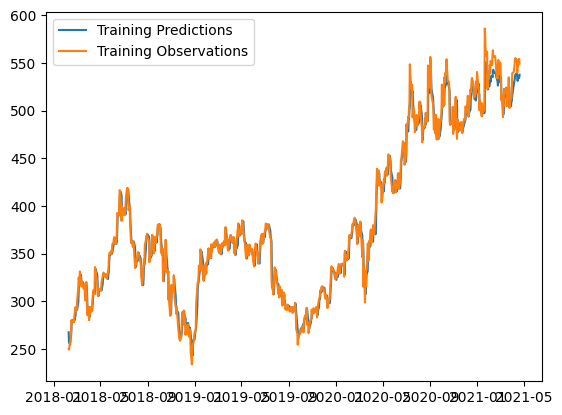

In [13]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

4/4 [==============================] - 0s 3ms/step


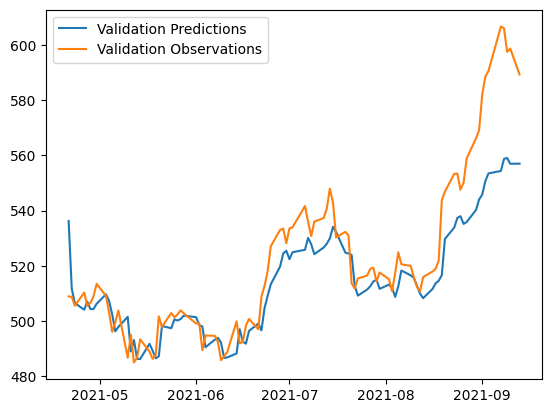

In [14]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

4/4 [==============================] - 0s 3ms/step


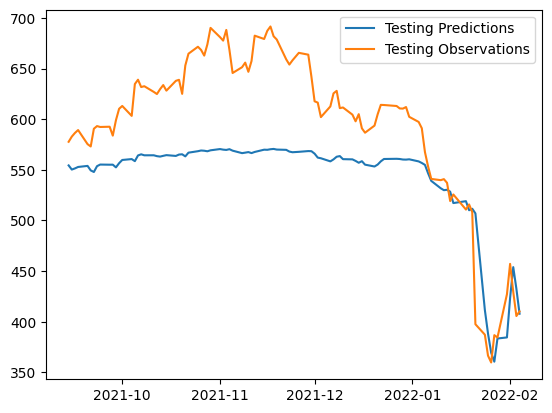

In [15]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

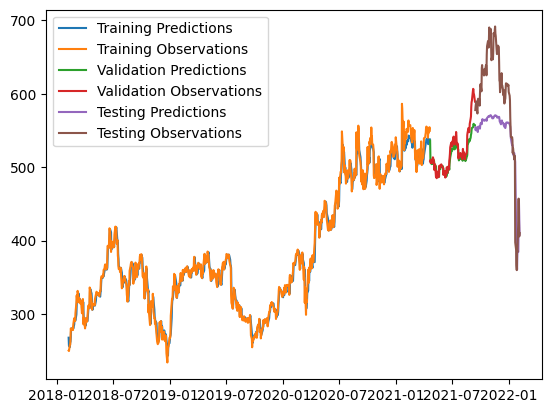

In [16]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [17]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 37ms/step


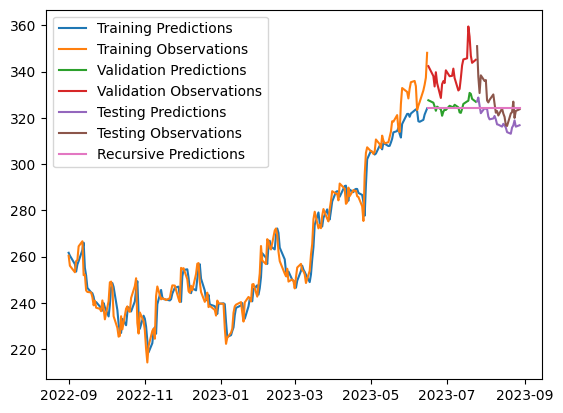

In [29]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])